In [1]:
using Plots

In [18]:
# We use anonymous functions
f = x -> 1 + x + x^2
f′ = x -> 1 + 2x
g = x -> 1 + x/3 + x^2
g′ = x -> 1/3 + 2x


x = 0.1
h = 0.00000000001
(f(x+h) - f(x))/h, (g(x+h) - g(x))/h, (sin(x+h) - sin(x))/h


(1.1999956583963467, 0.5333289365694327, 0.9950040791295579)

In [10]:
f′(x), g′(x), cos(x)

(1.2, 0.5333333333333333, 0.9950041652780258)

In [39]:
x = Float16(0)
h = Float16(2)^(-11)
(f(x+h) - f(x))/h, (g(x+h) - g(x))/h, (sin(x+h) - sin(x))/h

(Float16(0.0), Float16(0.0), Float16(1.0))

In [38]:
f′(x), g′(x), cos(x)

(Float16(1.0), 0.3333333333333333, Float16(1.0))

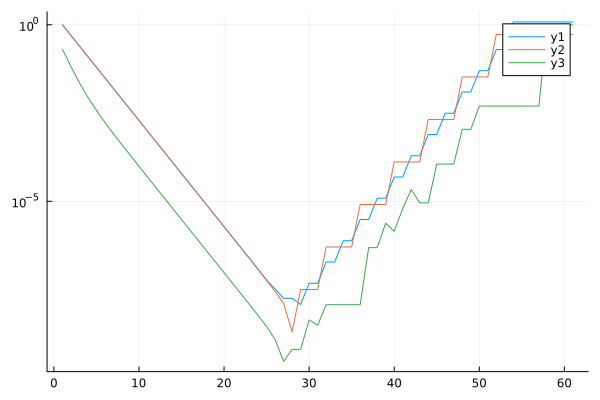

In [66]:
x = 0.1

nanabs = x -> iszero(x) ? NaN : abs(x) # avoid 0s

h = [2.0^k for k=0:-1:-60]
δ_f = (f.(x .+ h) .- f(x))./h .- f′(x) # a vector containing f(h[1])-f(0),f(h[2])-f(0),…,)
δ_g = (g.(x .+ h) .- g(x))./h .- g′(x)
δ_s = (sin.(x .+ h) .- sin(x))./h .- cos(x)


plot(nanabs.(δ_f); yscale=:log10)
plot!(nanabs.(δ_g); yscale=:log10) # plot! adds to existing plot
plot!(nanabs.(δ_s); yscale=:log10) # plot! adds to existing plot

Generic behaviour is exponential divergence! AFter initial exponential convergence. In special cases we get convergence.

**Exercise** Go through Example I.3.1 to understand on the bit level why we get convergence for f and g.